In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [1]:
import numpy as np

In [2]:
train_df=pd.read_csv('G:/train.tsv',sep='\t')

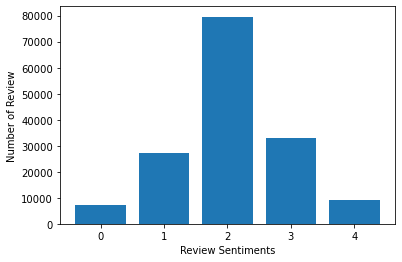

In [3]:
Sentiment_count=train_df.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [6]:
train_df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [7]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(train_df['Phrase'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, train_df['Sentiment'], test_size=0.3, random_state=123)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684


In [19]:
list(train_df.columns)

['PhraseId', 'SentenceId', 'Phrase', 'Sentiment']

In [20]:
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
train_df[train_df['Sentiment']<=2].sort_values('Sentiment',ascending=False).head()

,PhraseId,SentenceId,Phrase,Sentiment
156059,156060,8544,chortles,2
132117,132118,7123,"in Gosford Park -LRB- as well as one , Ms. Mir...",2
77196,77197,3970,despair about entrapment in the maze of modern...,2
77194,77195,3970,moan,2
77193,77194,3970,discreet moan,2


In [4]:
train_df[train_df['Sentiment']>=2].sort_values('Sentiment',ascending=False)

,PhraseId,SentenceId,Phrase,Sentiment
77092,77093,3966,Such master screenwriting comes courtesy of Jo...,4
135610,135611,7326,", it 's one of the most beautiful , evocative ...",4
101581,101582,5345,What makes the movie special,4
80333,80334,4139,rich and intelligent,4
28090,28091,1291,gleefully,4
...,...,...,...,...
61085,61086,3085,of flim-flam,2
61081,61082,3085,but a deficit of flim-flam,2
61078,61079,3085,customarily,2
61077,61078,3085,customarily jovial air,2
